https://huggingface.co/microsoft/Florence-2-large-ft

In [1]:
import requests
from PIL import Image,  ImageDraw, ImageFont
from transformers import AutoProcessor, AutoModelForCausalLM
import IPython.display as display

In [2]:
model = AutoModelForCausalLM.from_pretrained("yifeihu/TF-ID-base", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("yifeihu/TF-ID-base", trust_remote_code=True)

In [3]:
prompt = "<OD>"
url = "https://huggingface.co/yifeihu/TF-ID-base/resolve/main/arxiv_2305_10853_5.png?download=true"
image = Image.open(requests.get(url, stream=True).raw)

In [4]:
inputs = processor(text=prompt, images=image, return_tensors="pt")
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    do_sample=False,
    num_beams=3
)


In [5]:
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
parsed_answer = processor.post_process_generation(generated_text, task="<OD>", image_size=(image.width, image.height))

print(parsed_answer)

{'<OD>': {'bboxes': [[131.75, 192.5, 803.25, 1567.5], [849.1500244140625, 1277.0999755859375, 1522.35009765625, 1673.0999755859375]], 'labels': ['figure', 'table']}}


In [6]:
image.show()

In [9]:
draw = ImageDraw.Draw(image)

In [10]:
colors = {
    'figure': 'red',
    'table': 'blue'
}

In [11]:
for bbox, label in zip(parsed_answer['<OD>']['bboxes'], parsed_answer['<OD>']['labels']):
    x0, y0, x1, y1 = bbox
    draw.rectangle([x0, y0, x1, y1], outline=colors.get(label, 'white'), width=3)
    draw.text((x0, y0 - 10), label, fill=colors.get(label, 'white'))

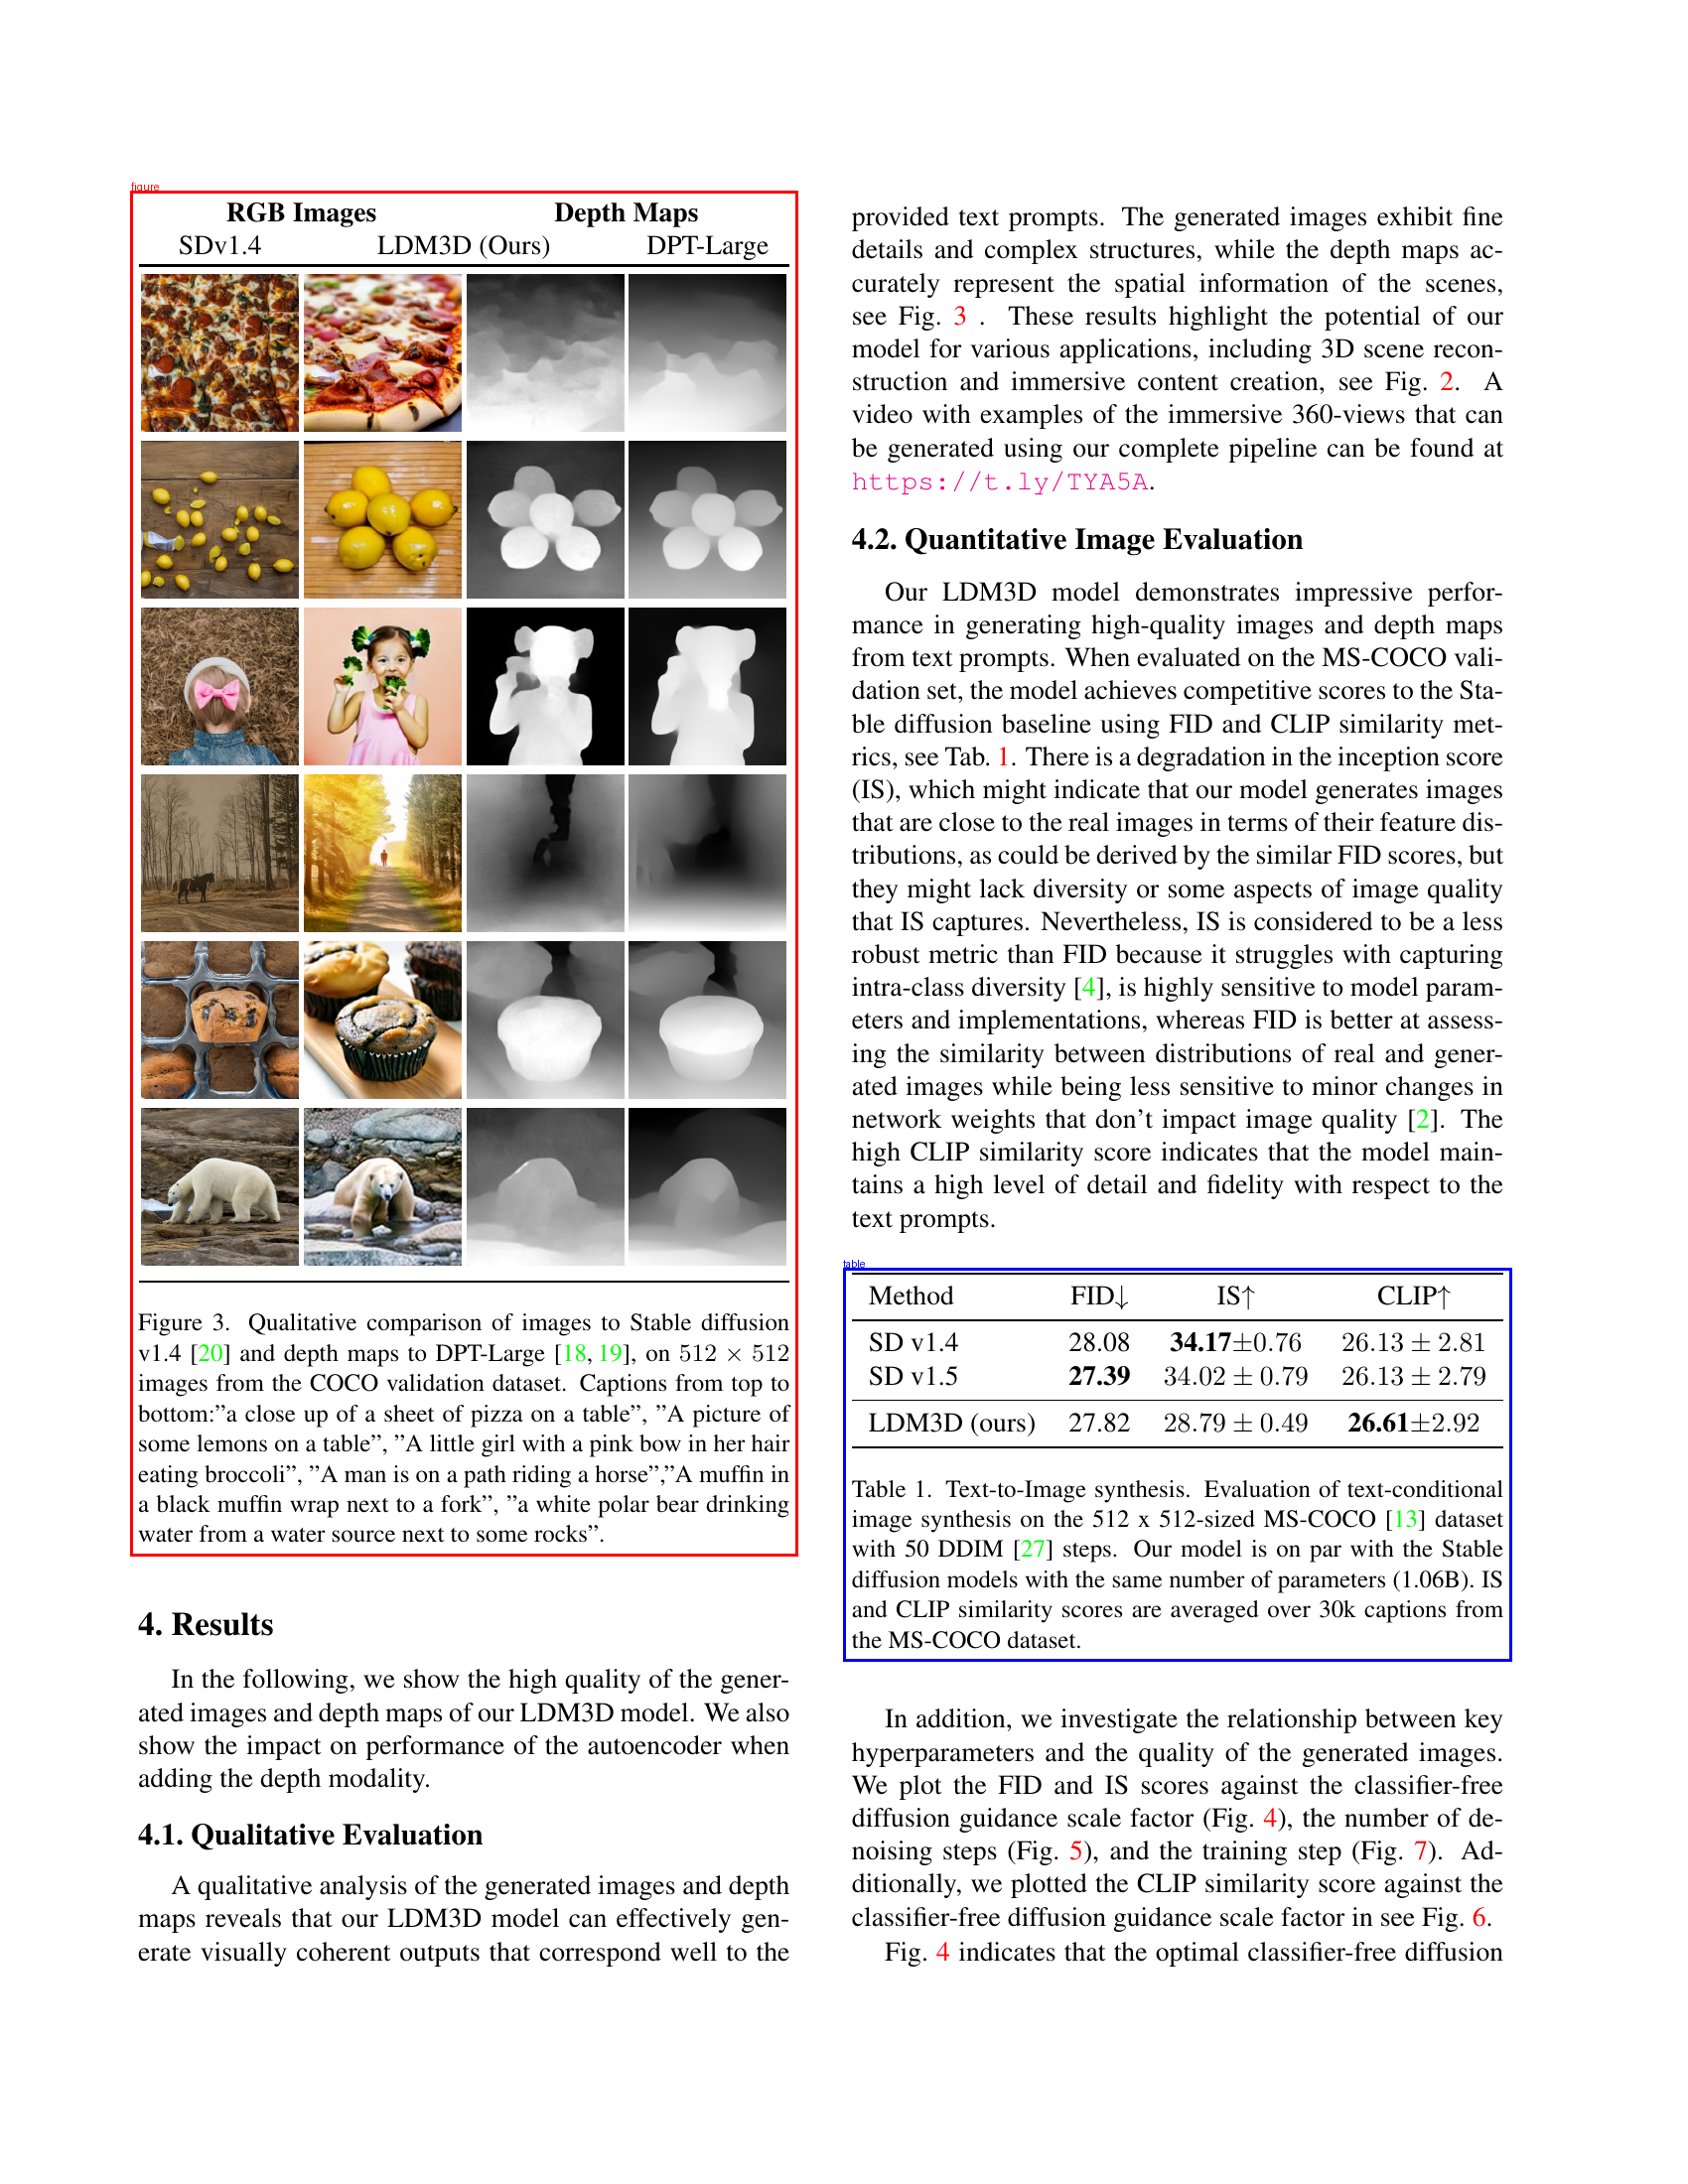

In [14]:
display.display(image)